In [1]:
# creating random uniform data set
# generating random normal data set using box_muller method

import numpy as np
import matplotlib.pyplot as plt

# min value
m=0

# max value
M=1

# length of data set
n=10**5


u_1=np.random.uniform(m,M,size=n)
u_2=np.random.uniform(m,M,size=n)

# box-muller formulas
n_1=np.sqrt(-2*np.log(u_1))*np.cos(2*np.pi*u_2)
n_2=np.sqrt(-2*np.log(u_1))*np.sin(2*np.pi*u_2)

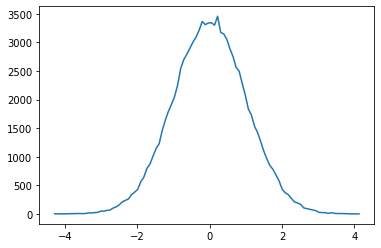

In [2]:
# creating PDF of a data set

data=n_2

# number of intervals
n_w=100

# width of intervals
w=(max(data)-min(data))/n_w

p=np.zeros(n_w)

# a set of numbers that shows the midpoints of intervals
x=np.array(range(n_w))
x=min(data)+(2*x+1)*w/2

m=min(data)

# counting the number of points that we have in each interval (generating PDF (p))

for i in range(len(data)):
    j=np.floor((data[i]-m)/w)
    if j==n_w:
        j=n_w-1
    p[int(np.floor(j))]=p[int(np.floor(j))]+1   


plt.plot(x,p)
plt.show()

In [3]:
# normalization of p
pp=p/n

log_p=np.log(p)

# calculating the error for each interval
sigma=np.zeros(n_w)
sigma=np.sqrt(1-pp)/n


sigma_log=0.434*sigma/pp

<ipython-input-3-b54cd7b2eeaf>:4: RuntimeWarning: divide by zero encountered in log
  log_p=np.log(p)
<ipython-input-3-b54cd7b2eeaf>:11: RuntimeWarning: divide by zero encountered in true_divide
  sigma_log=0.434*sigma/pp


/home/fahimeh/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]


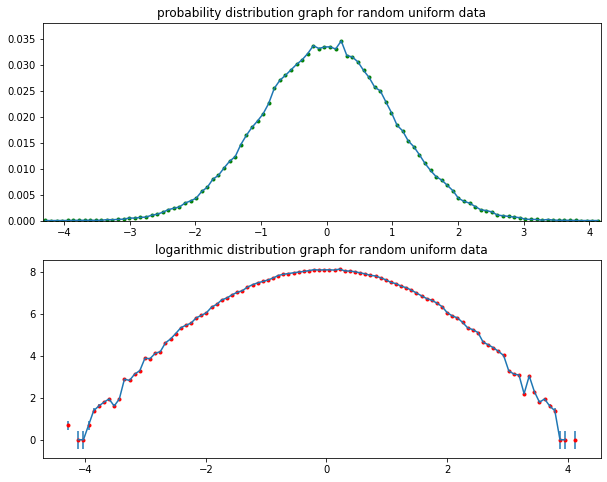

In [11]:
# ploting p and log(p)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(x,pp,'g.')
plt.errorbar(x, pp, sigma)
# 'g.' indicates "green" dots ( "." )

plt.title('probability distribution graph for random uniform data')
plt.axis([min(data),max(data),0.,1.1*max(pp)])

plt.subplot(2,1,2)        
plt.errorbar(x, log_p, sigma_log) 
plt.plot(x,log_p,'r.')
# 'r.' indicates "red" dots ( "." )

plt.title('logarithmic distribution graph for random uniform data')
#plt.axis([min(data),max(data),8,max(log_p)*1.02])

plt.show()

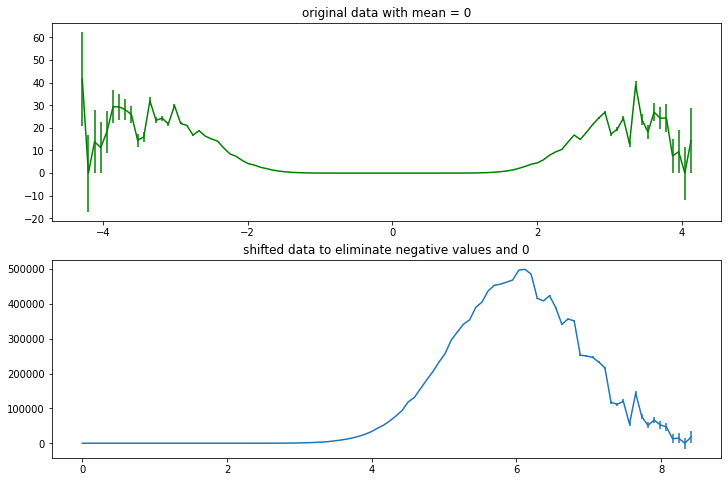

In [10]:
# graph of x^k * p(x) versus x

plt.figure(figsize=(12,8))

k=10

# using original data set with mean = 0 
plt.subplot(2,1,1)  
plt.errorbar(x,  pp*(x**k),(x**k)*np.sqrt(1-pp)/n,color='g') 
plt.title('original data with mean = 0')

# shifting our values by min value of our data to eliminate the effect of x=0
plt.subplot(2,1,2) 
plt.errorbar((x-min(x)),pp*((x-min(x))**k), ((x-min(x))**k)*np.sqrt(1-pp)/n) 
plt.title('shifted data to eliminate negative values and 0')


plt.show()